# $B_g$ RSD direction check 
Converge tests of derivatives showed noticeable discrepancies between the average $B_g$ derivatives for the different RSD directions. This notebook is to check whether this is an issue. 

Check: 
- average $B_g$ along the different RSD directions are not substantially different
- whether differences are coming from fiducial

In [1]:
import os 
import h5py 
import numpy as np
# --- eMaNu --- 
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
kf = 2.*np.pi/1000. # fundmaentla mode
kmax = 0.5 

Lets start by examining $\overline{P_g}$ for fiducial

In [4]:
pfid0 = Obvs.quijhod_Pk('fiducial', seed=0, rsd=0, flag='reg', silent=False) 
pfid1 = Obvs.quijhod_Pk('fiducial', seed=0, rsd=1, flag='reg', silent=False) 
pfid2 = Obvs.quijhod_Pk('fiducial', seed=0, rsd=2, flag='reg', silent=False) 

['quijhod_P_fiducial.reg.seed0.rsd0.hdf5']
['quijhod_P_fiducial.reg.seed0.rsd1.hdf5']
['quijhod_P_fiducial.reg.seed0.rsd2.hdf5']


In [5]:
k = pfid0['k']
pklim = (k <= kmax)

Text(0, 0.5, '$P_g$ ratio')

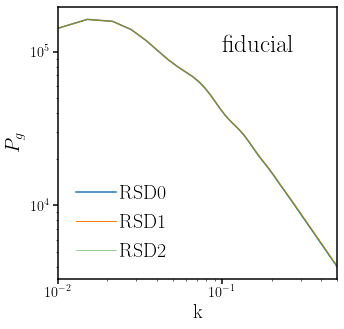

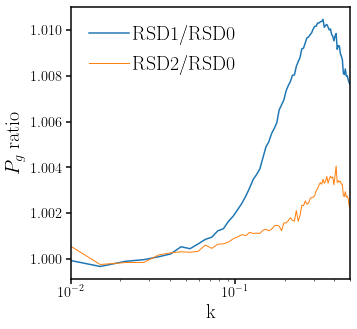

In [6]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.plot(k[pklim], np.average(pfid0['p0k'], axis=0)[pklim], lw=1.5, label='RSD0')
sub.plot(k[pklim], np.average(pfid1['p0k'], axis=0)[pklim], lw=1, label='RSD1')
sub.plot(k[pklim], np.average(pfid2['p0k'], axis=0)[pklim], lw=0.5, label='RSD2')
sub.text(0.1, 1e5, 'fiducial', fontsize=25)
sub.legend(loc='lower left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_g$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.plot(k[pklim], np.average(pfid1['p0k'], axis=0)[pklim]/np.average(pfid0['p0k'], axis=0)[pklim], lw=1.5, label='RSD1/RSD0')
sub.plot(k[pklim], np.average(pfid2['p0k'], axis=0)[pklim]/np.average(pfid0['p0k'], axis=0)[pklim], lw=1, label='RSD2/RSD0')
sub.legend(loc='upper left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_g$ ratio', fontsize=20)

Lets start by examining $\overline{B_g}$ for the fiducial value

In [7]:
fid0 = Obvs.quijhod_Bk('fiducial', seed=0, rsd=0, flag='reg', silent=False) 
fid1 = Obvs.quijhod_Bk('fiducial', seed=0, rsd=1, flag='reg', silent=False) 
fid2 = Obvs.quijhod_Bk('fiducial', seed=0, rsd=2, flag='reg', silent=False) 

['quijhod_B_fiducial.reg.seed0.rsd0.hdf5']
['quijhod_B_fiducial.reg.seed0.rsd1.hdf5']
['quijhod_B_fiducial.reg.seed0.rsd2.hdf5']


In [8]:
i_k, j_k, l_k = fid0['k1'], fid0['k2'], fid0['k3']
bklim = ((i_k*kf <= kmax) & (j_k*kf <= kmax) & (l_k*kf <= kmax)) # k limit 

Text(0, 0.5, '$B_g$ ratio')

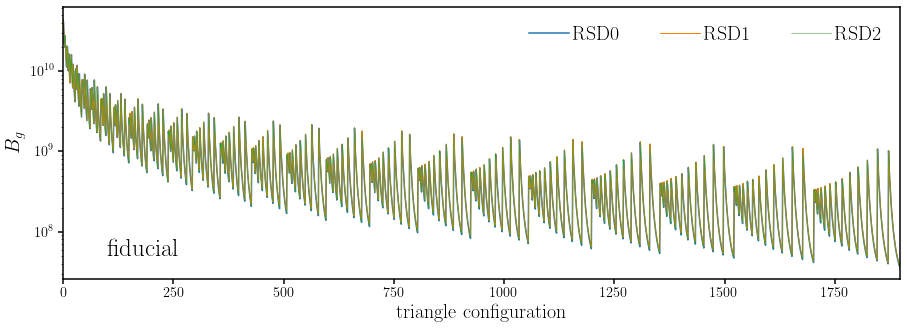

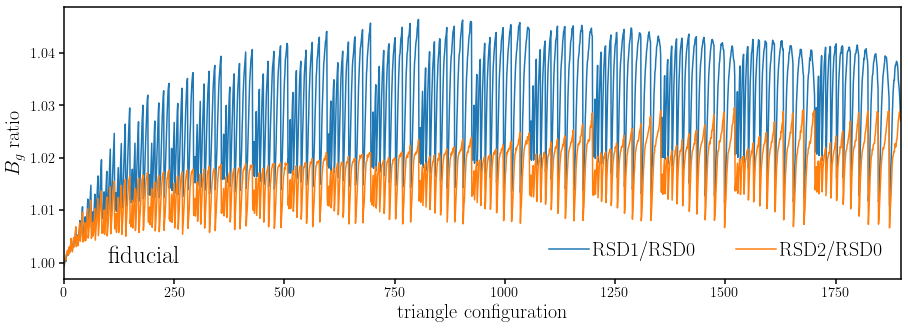

In [9]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(fid0['b123'], axis=0)[bklim], lw=1.5, label='RSD0')
sub.plot(range(np.sum(bklim)), np.average(fid1['b123'], axis=0)[bklim], lw=1, label='RSD1')
sub.plot(range(np.sum(bklim)), np.average(fid2['b123'], axis=0)[bklim], lw=0.5, label='RSD2')
sub.text(100, 5e7, 'fiducial', fontsize=25)
sub.legend(loc='upper right', ncol=3, handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(fid1['b123'], axis=0)[bklim]/np.average(fid0['b123'], axis=0)[bklim], label='RSD1/RSD0')
sub.plot(range(np.sum(bklim)), np.average(fid2['b123'], axis=0)[bklim]/np.average(fid0['b123'], axis=0)[bklim], label='RSD2/RSD0')
sub.legend(loc='lower right', ncol=3, handletextpad=0.2, fontsize=20)
sub.text(100, 1, 'fiducial', fontsize=25)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

In [10]:
omm0 = Obvs.quijhod_Bk('Om_m', seed=0, rsd=0, flag='reg', silent=False) 
omm1 = Obvs.quijhod_Bk('Om_m', seed=0, rsd=1, flag='reg', silent=False) 
omm2 = Obvs.quijhod_Bk('Om_m', seed=0, rsd=2, flag='reg', silent=False) 

['quijhod_B_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd2.hdf5']


Text(0, 0.5, '$B_g$ ratio')

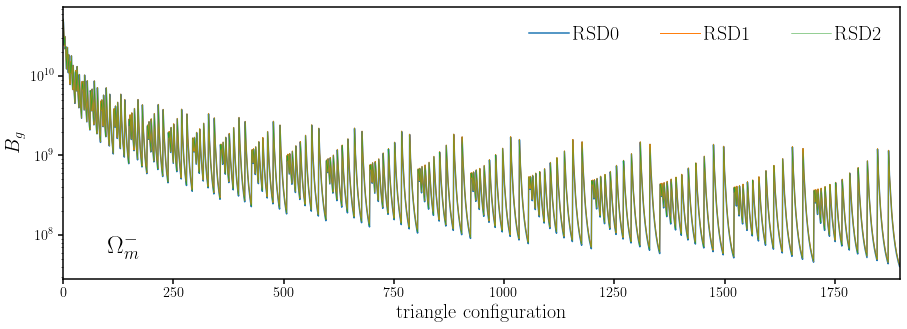

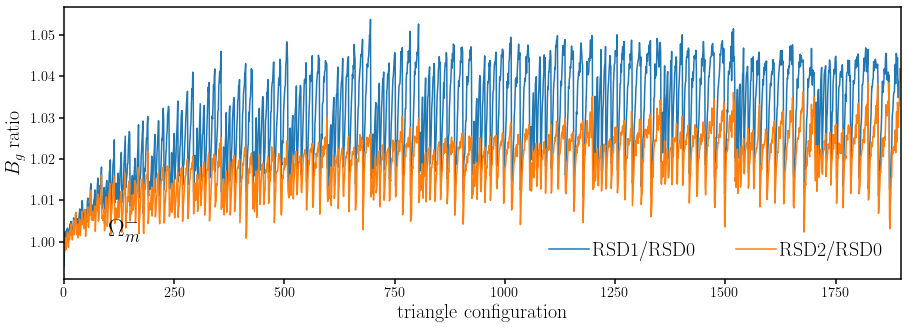

In [11]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(omm0['b123'], axis=0)[bklim], lw=1.5, label='RSD0')
sub.plot(range(np.sum(bklim)), np.average(omm1['b123'], axis=0)[bklim], lw=1, label='RSD1')
sub.plot(range(np.sum(bklim)), np.average(omm2['b123'], axis=0)[bklim], lw=0.5, label='RSD2')
sub.text(100, 5e7, '$\Omega_m^-$', fontsize=25)
sub.legend(loc='upper right', ncol=3, handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(omm1['b123'], axis=0)[bklim]/np.average(omm0['b123'], axis=0)[bklim], label='RSD1/RSD0')
sub.plot(range(np.sum(bklim)), np.average(omm2['b123'], axis=0)[bklim]/np.average(omm0['b123'], axis=0)[bklim], label='RSD2/RSD0')
sub.legend(loc='lower right', ncol=3, handletextpad=0.2, fontsize=20)
sub.text(100, 1, '$\Omega_m^-$', fontsize=25)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

**Yup. This seems like a bug**... was this also the case with halo B? 

In [12]:
phfid0 = Obvs.quijotePk('fiducial', rsd=0, flag='reg', silent=False) 
phfid1 = Obvs.quijotePk('fiducial', rsd=1, flag='reg', silent=False) 
phfid2 = Obvs.quijotePk('fiducial', rsd=2, flag='reg', silent=False) 

['quijote_fiducial.reg.rsd0.hdf5']
['quijote_fiducial.reg.rsd1.hdf5']
['quijote_fiducial.reg.rsd2.hdf5']


In [13]:
kh = phfid0['k']
phklim = (kh <= kmax)

Text(0, 0.5, '$P_h$ ratio')

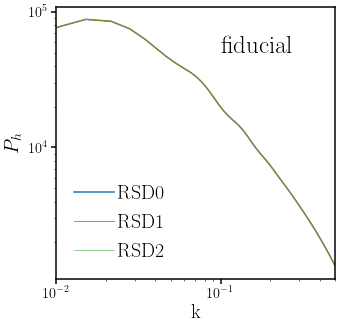

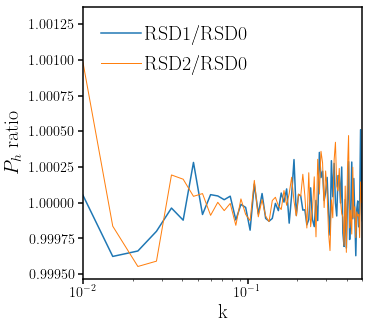

In [14]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.plot(kh[phklim], np.average(phfid0['p0k'], axis=0)[phklim], lw=1.5, label='RSD0')
sub.plot(kh[phklim], np.average(phfid1['p0k'], axis=0)[phklim], lw=1, label='RSD1')
sub.plot(kh[phklim], np.average(phfid2['p0k'], axis=0)[phklim], lw=0.5, label='RSD2')
sub.text(0.1, 5e4, 'fiducial', fontsize=25)
sub.legend(loc='lower left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_h$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.plot(kh[phklim], np.average(phfid1['p0k'], axis=0)[phklim]/np.average(phfid0['p0k'], axis=0)[phklim], lw=1.5, label='RSD1/RSD0')
sub.plot(kh[phklim], np.average(phfid2['p0k'], axis=0)[phklim]/np.average(phfid0['p0k'], axis=0)[phklim], lw=1, label='RSD2/RSD0')
sub.legend(loc='upper left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_h$ ratio', fontsize=20)

In [15]:
bhfid0 = Obvs.quijoteBk('fiducial', rsd=0, flag='reg', silent=False) 
bhfid1 = Obvs.quijoteBk('fiducial', rsd=1, flag='reg', silent=False) 
bhfid2 = Obvs.quijoteBk('fiducial', rsd=2, flag='reg', silent=False) 

['quijote_fiducial.reg.rsd0.hdf5']
['quijote_fiducial.reg.rsd1.hdf5']
['quijote_fiducial.reg.rsd2.hdf5']


Text(0, 0.5, '$B_g$ ratio')

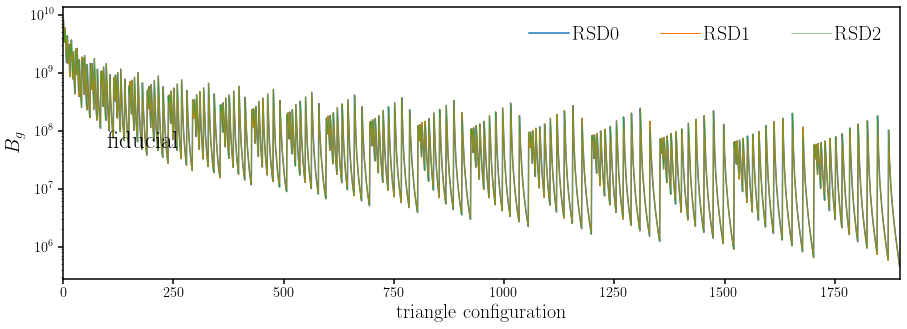

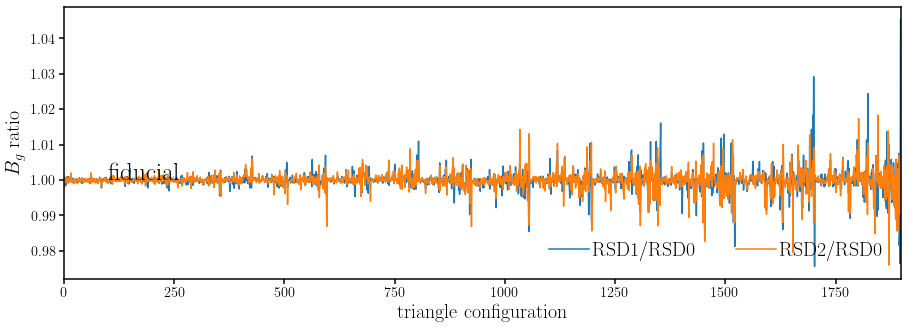

In [16]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(bhfid0['b123'], axis=0)[bklim], lw=1.5, label='RSD0')
sub.plot(range(np.sum(bklim)), np.average(bhfid1['b123'], axis=0)[bklim], lw=1, label='RSD1')
sub.plot(range(np.sum(bklim)), np.average(bhfid2['b123'], axis=0)[bklim], lw=0.5, label='RSD2')
sub.text(100, 5e7, 'fiducial', fontsize=25)
sub.legend(loc='upper right', ncol=3, handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(bhfid1['b123'], axis=0)[bklim]/np.average(bhfid0['b123'], axis=0)[bklim], label='RSD1/RSD0')
sub.plot(range(np.sum(bklim)), np.average(bhfid2['b123'], axis=0)[bklim]/np.average(bhfid0['b123'], axis=0)[bklim], label='RSD2/RSD0')
sub.legend(loc='lower right', ncol=3, handletextpad=0.2, fontsize=20)
sub.text(100, 1, 'fiducial', fontsize=25)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

**No. This is not the case with the halo catalog.**

# varying HOD seed
examining the satellite peculiar velocities seem to suggest that the problem might be the HOD seed. Lets compare the bispectrum with `seed=0` to 100 realizations with `seed=1` to see if the RSD ratios are different.

In [17]:
omm0_1 = Obvs.quijhod_Bk('Om_m', seed=1, rsd=0, flag='reg', silent=False) 
omm1_1 = Obvs.quijhod_Bk('Om_m', seed=1, rsd=1, flag='reg', silent=False) 
omm2_1 = Obvs.quijhod_Bk('Om_m', seed=1, rsd=2, flag='reg', silent=False) 

['quijhod_B_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd2.hdf5']


Text(0, 0.5, '$B_g$ ratio')

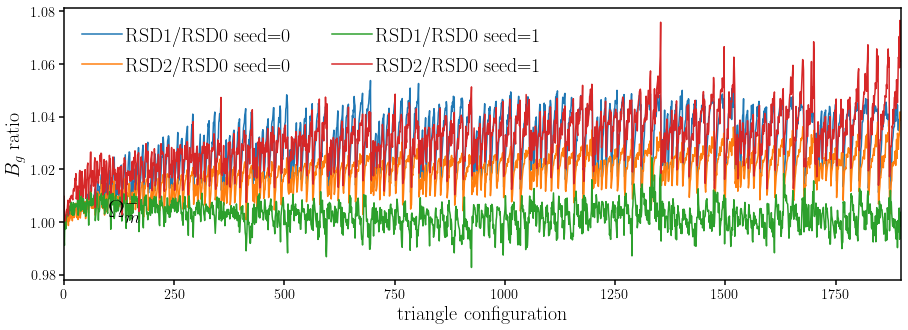

In [19]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(omm1['b123'], axis=0)[bklim]/np.average(omm0['b123'], axis=0)[bklim], label='RSD1/RSD0 seed=0')
sub.plot(range(np.sum(bklim)), np.average(omm2['b123'], axis=0)[bklim]/np.average(omm0['b123'], axis=0)[bklim], label='RSD2/RSD0 seed=0')
sub.plot(range(np.sum(bklim)), np.average(omm1_1['b123'], axis=0)[bklim]/np.average(omm0_1['b123'], axis=0)[bklim], label='RSD1/RSD0 seed=1')
sub.plot(range(np.sum(bklim)), np.average(omm2_1['b123'], axis=0)[bklim]/np.average(omm0_1['b123'], axis=0)[bklim], label='RSD2/RSD0 seed=1')
sub.legend(loc='upper left', ncol=2, handletextpad=0.2, fontsize=20)
sub.text(100, 1, '$\Omega_m^-$', fontsize=25)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

This seems to confirm that this issue is caused by the HOD seed. In addition to the halo realizations we'll also have to run multiple HOD seeds for the derivatives. 